In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

In [9]:
photopeaks=[] #store the photopeak energies as we go along
att=[] #store the attenuation coefficients as we go along

def func(x,a,b,c):
    return a*np.exp(-b*x)+c

plt.rc('text', usetex=True)

mu 0.0295
mu_rho 0.0798
Statistical error (mm^-1)0.006368507555828898
Statistical error (%)21.5528631645789
[ 0.    6.47 12.89 19.64 26.2  38.91]
[2461.64327442 2157.77389152 1908.54352275 1692.80127531 1520.5771766
 1268.48320131]
Parameter matrix: 
[1.74623416e+03 2.95483134e-02 7.15409115e+02]
Covariance matrix: 
[[ 4.14771459e+04 -1.22792380e+00 -4.40883622e+04]
 [-1.22792380e+00  4.05578885e-05  1.37212739e+00]
 [-4.40883622e+04  1.37212739e+00  4.81399066e+04]]
Correlation matrix: 
[[ 1.         -0.94673692 -0.98665862]
 [-0.94673692  1.          0.98198339]
 [-0.98665862  0.98198339  1.        ]]


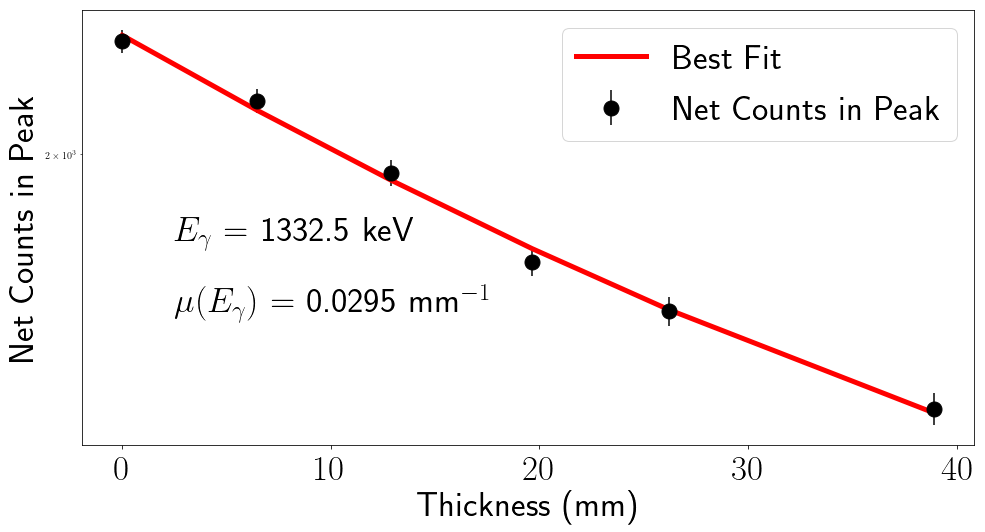

In [22]:
#Fill in energies and use right text files
t=[]
counts=[]
E=[]
f=open('al-60co2.txt','r')

for line in f.readlines():
    line = line.strip().split()
    nrg=float(line[0])
    thick=float(line[1])
    ct=float(line[2])
    
    E.append(nrg)
    t.append(thick)
    counts.append(ct)

photopeaks.append(E[0])

#print(t)
#print(counts)

thickness = np.asarray(t)
net = np.asarray(counts)

err = []

for count in net:
    e = np.sqrt(count)+0.0197
    err.append(e)
    
error = np.asarray(err)

popt, pcov = curve_fit(func, thickness, net, sigma = error, p0=[17000,0.05,300])

mu = str(round(popt[1],4))

mu_rho = str(round(2.699*popt[1],4)) #put in the right value once we know it to compare
#with the XCOM value

print('mu '+mu)

print('mu_rho '+mu_rho)

print('Statistical error (mm^-1)'+str(np.sqrt(pcov[1][1])))

print('Statistical error (%)'+str(100*np.sqrt(pcov[1][1])/popt[1]))


fig=plt.figure(figsize=(16,8))

plt.errorbar(t,counts,yerr=error,fmt='o',color='k',label="Net Counts in Peak",markersize=15)

plt.plot(thickness,func(thickness,*popt),color='r',lw=5,label='Best Fit')

plt.xlabel("Thickness (mm)",fontsize=35)
plt.ylabel("Net Counts in Peak",fontsize=35)
plt.tick_params(axis='x',labelsize=35)
plt.tick_params(axis='y',labelsize=35)
plt.yscale('log')
plt.legend(loc='best',fontsize=35)

plt.text(2.5,1700, r'$E_{\gamma}$ = 1332.5 keV', fontsize = 35)
plt.text(2.5,1500, r'$\mu(E_{\gamma})$ = '+mu+" mm$^{-1}$", fontsize = 35)

plt.savefig("60co-al-1332.pdf")


print(thickness)
print(func(thickness,*popt))

# Calculating the diagonal^(-1/2) of covariance matrix\n",
diag=np.zeros((3,3))
for i in range(0,3):
    for j in range(0,3):
        if(i != j):
            diag[i][j] = 0
        else:
            diag[i][j] = 1/np.sqrt(pcov[i][j])
            

            
pcorr=np.matmul(diag,np.matmul(pcov,diag))
                                   

print("Parameter matrix: ")
print(popt)        
    
print("Covariance matrix: ")
print(pcov)    

print("Correlation matrix: ")
print(pcorr)

In [67]:
t2=[]
counts2=[]

for i in range(len(t)):
    if(i%2 == 0):
        t2.append(t[i])
        counts2.append(counts[i])
        
print(t2)
print(counts2)

[0.0, 3.88, 7.73, 15.9, 28.22, 40.6]
[16659.0, 10578.0, 6919.0, 2778.0, 704.0, 169.0]


In [72]:
thickness2 = np.asarray(t2)
net2 = np.asarray(counts2)

err2 = []

for count in net2:
    e2 = np.sqrt(count2)
    err2.append(e2)
    
error2 = np.asarray(err2)

print(error2)


popt2, pcov2 = curve_fit(func, thickness2, net2, sigma = error2, p0=[17000,0.05,300])

print('mu '+str(popt2[1]))

print('Statistical error '+str(np.sqrt(pcov2[1][1])))

print('Statistical error '+str(100*np.sqrt(pcov2[1][1])/popt2[1]))

mu_pb = str(round(popt2[1],4))

rho_pb = 1.00 #put in the right value once we know it to compare
#with the XCOM value

fig=plt.figure(figsize=(16,8))

plt.errorbar(t2,counts2,yerr=error2,fmt='o',color='k',label="Net Counts in Peak",markersize=15)

plt.plot(thickness2,func(thickness2,*popt),color='r',lw=5,label='Best Fit')

plt.xlabel("Thickness (mm)",fontsize=35)
plt.ylabel("Net Counts in Peak",fontsize=35)
plt.tick_params(axis='x',labelsize=35)
plt.tick_params(axis='y',labelsize=35)
plt.yscale('log')
plt.legend(loc='best',fontsize=35)

plt.text(2.5,1000, r'$E_{\gamma}$ = 661.7 keV', fontsize = 35)
plt.text(2.5,500, r'$\mu(E_{\gamma})$ = '+mu_pb+" mm$^{-1}$", fontsize = 35)

plt.savefig("137cs-pb-2.pdf")

[]


ValueError: `sigma` has incorrect shape.